In [1]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

###**LOAD AUDIO DATA**

In [25]:
# load audio file in the player
audio_path = "/content/drive/MyDrive/Librosa-Github/classical.00024.wav"
ipd.Audio(audio_path)

In [26]:
# load audio file
signal, sr = librosa.load(audio_path)

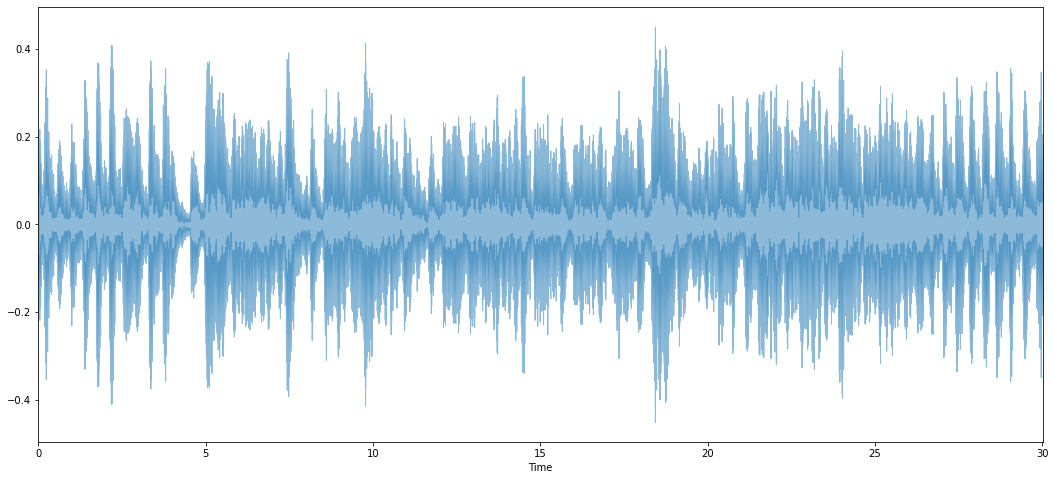

In [27]:
# plot waveform
plt.figure(figsize=(18, 8))
librosa.display.waveplot(signal, sr=sr, alpha=0.5)
plt.show()

###**FOURIER TRANSFORM**

An audio signal is a complex signal composed of multiple ‘single-frequency sound waves’ which travel together as a disturbance(pressure-change) in the medium. When sound is recorded we only capture the resultant amplitudes of those multiple waves. Fourier Transform is a mathematical concept that can decompose a signal into its constituent frequencies. Fourier transform does not just give the frequencies present in the signal, It also gives the magnitude of each frequency present in the signal.

![image](https://user-images.githubusercontent.com/81585804/128593444-df945ea2-c4d4-4e48-80aa-ee48e9bcd127.png)


Inverse Fourier Transform is just the opposite of the Fourier Transform. It takes the frequency-domain representation of a given signal as input and does mathematically synthesize the original signal.

In [5]:
# derive spectrum using FT
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

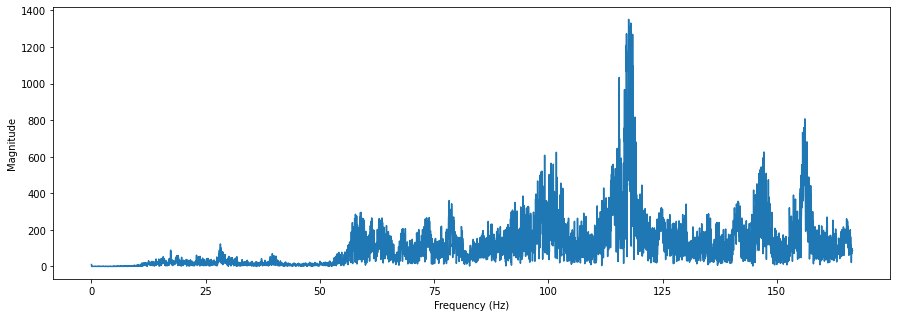

In [12]:
# plot spectrum
plt.figure(figsize=(15, 5))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [7]:
len(signal)

661794

In [8]:
d =  1 / sr
d

4.5351473922902495e-05

In [9]:
d_523 = 1 / 523
d_523

0.0019120458891013384

In [10]:
d_400_samples = 400 * d
d_400_samples

0.018140589569160998

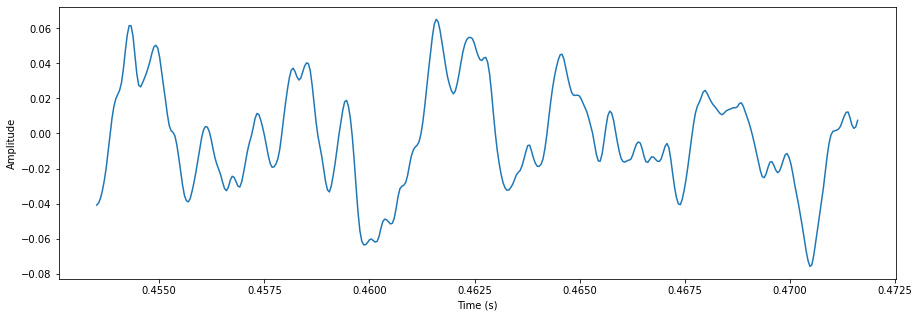

In [13]:
# zomm in to the waveform
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(15, 5))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

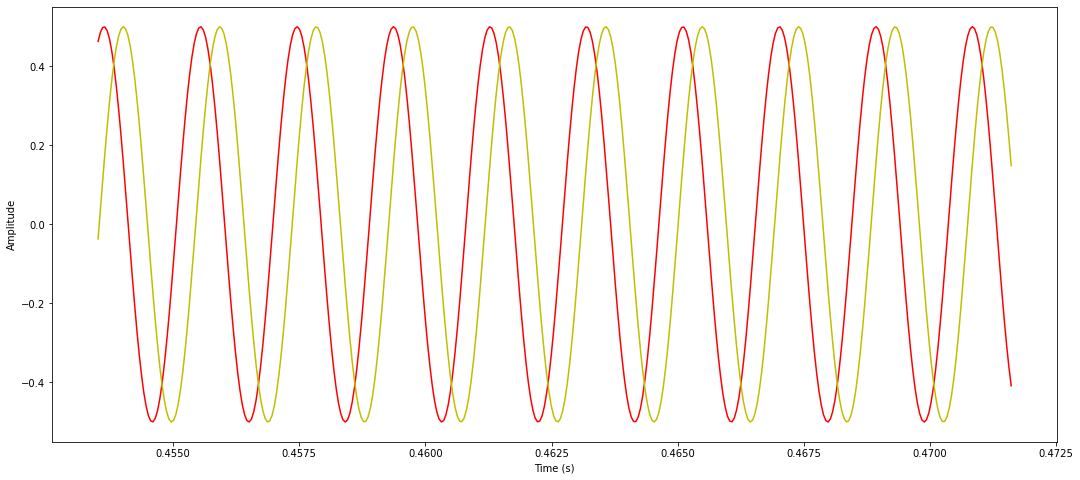

In [14]:
# create a sinusoid

f = 523
phase = 0
phase2 = 0.2

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

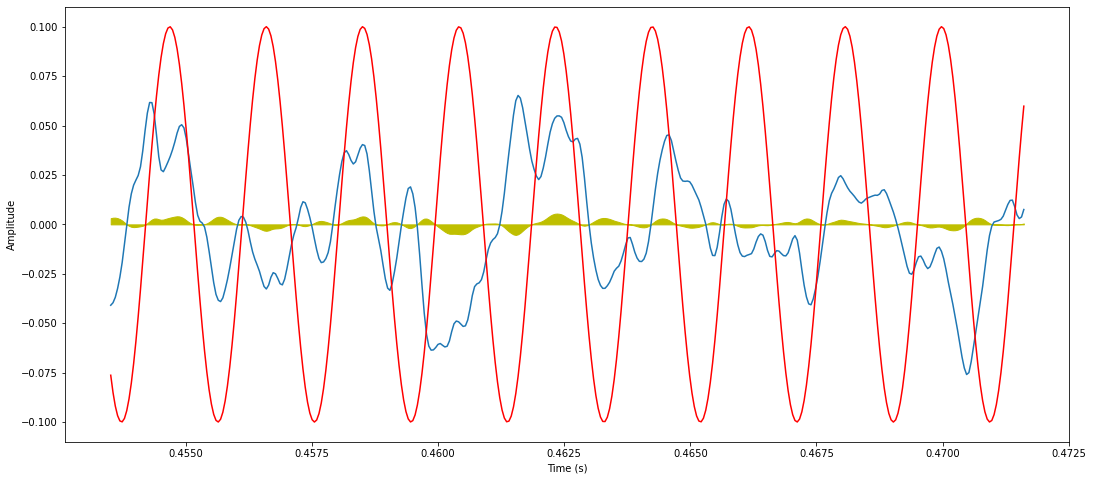

In [15]:
# compare signal and sinusoids

f = 523
phase = 0.55

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

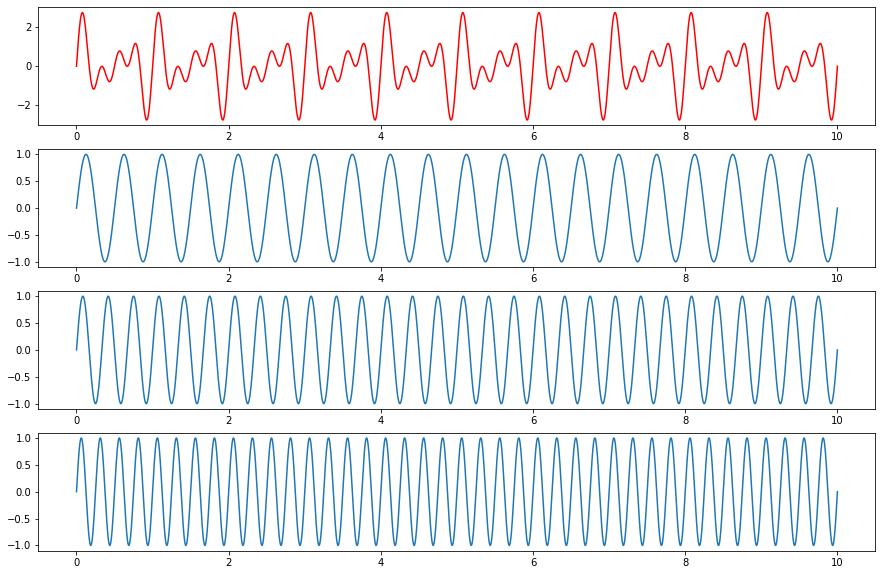

In [17]:
# superimposing pure tones
f = 1
t = np.linspace(0, 10, 10000)

sin = np.sin(2*np.pi * (2*f * t))
sin2 = np.sin(2*np.pi * (3*f * t))
sin3 = np.sin(2*np.pi * (4*f * t))

sum_signal = sin + sin2 + sin3

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, sum_signal, color="r")

plt.subplot(4, 1, 2)
plt.plot(t, sin)

plt.subplot(4, 1, 3)
plt.plot(t, sin2)

plt.subplot(4, 1, 4)
plt.plot(t, sin3)

plt.show()